This notebook contains all code used to make my thesis plots.

In [602]:
from copy import deepcopy
from contextlib import contextmanager

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import izip
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter, MultipleLocator
from collections import namedtuple
from IPython.display import IFrame
import functools

%matplotlib inline

get_ipython().magic(u'load_ext autoreload')
get_ipython().magic(u'autoreload 2')


mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (7.0, 4.0)  # default size of plots
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.scatterpoints'] = 1
mpl.rcParams['legend.numpoints'] = 1
# mpl.rcParams.update({'font.size': 24, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
mpl.rcParams.update({'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
pd.set_option('display.max_colwidth', 120)
pd.set_option('display.max_columns', 200)

In [83]:
from common_plots import *

In [4]:
# Make subsets based on masses, and passing ALL NMSSMTools constraints (i.e. don't ignore g-2 and relic density)
from make_hdf5 import subset_var

In [5]:
# Here get your dataframes.
# Extract dataframes from binary
store = pd.HDFStore("points_500_MICRO_SCAN_NTv491_HBv431_HSv140_largeRange_DMass2_fixAssignMass_19_May_16_1513.h5")
# df_orig = store.full12loop_all
df_pass_all = store.full12loop_good_posMuMagMom_planckUpperOnly_ignorebctaunu_ignorechi2 #'relaxed' constraints - +ve g-2 and omegah^2

store.close()

In [986]:
def get_backend():
    return list(get_ipython().magic(u"config InlineBackend.figure_formats"))

In [997]:
def set_backend(fmt):
    print 'Setting backend', fmt
    get_ipython().magic(u"config InlineBackend.figure_formats = '%s', " % fmt)

In [988]:
@contextmanager
def backend(fmt):
    old_fmt = get_backend()[0]
    set_backend(fmt)
    yield
    set_backend(old_fmt)

In [1032]:
def save_fig(func):
    """Decorator func for easily saving plots in jupyter notebook.
    
    Just add in a filename=XXX to your normal function arguments.
    It will auto switch backends correctly.
    """
    def wrapper(*args, **kwargs):
        filename = kwargs['filename']
        if filename == '':
            raise IOError('No filename')
        if '.' not in filename:
            raise IOError('No extension in filename: %s' % filename)
        fmt = os.path.splitext(filename)[1].lstrip('.') if SAVE_PLOTS else 'png'
        with backend(fmt):
            new_kwargs = deepcopy(kwargs)
            del new_kwargs['filename']
            func(*args, **new_kwargs)
            if SAVE_PLOTS: 
                save_plot(filename)
    return wrapper


In [1033]:
SAVE_PLOTS = True

if SAVE_PLOTS:
    set_backend('png')
    mpl.rcParams['savefig.dpi'] = 100
else:
    set_backend('png')
    mpl.rcParams['savefig.dpi'] = 72

Setting backend png


In [601]:
for k,v in mpl.rcParams.iteritems():
    if 'size' in k.lower():
        print k, v

lines.markersize 6.0
ytick.minor.size 5.0
figure.figsize [7.0, 4.0]
font.size 18.0
legend.fontsize large
axes.titlesize large
xtick.minor.size 5.0
xtick.major.size 10.0
xtick.labelsize 16.0
ytick.major.size 10.0
axes.labelsize 18.0
agg.path.chunksize 0
ytick.labelsize 16.0
ps.papersize letter


In [6]:
df_pass_all_ma1 = subset_var(df_pass_all, 3.5, 10.5, 'ma1')

In [250]:
title = 'Relaxed constraints'
SIZE = 15

In [1034]:
@save_fig
def plot_ma1_inputparams(df, title):
    plot_input_params_scatters(df, 'ma1', r'$m_{a_1}\ \mathrm{[GeV]}$', 
                               yrange=[0, 20], title=title, cols=2, s=SIZE)

Setting backend png
Setting backend png


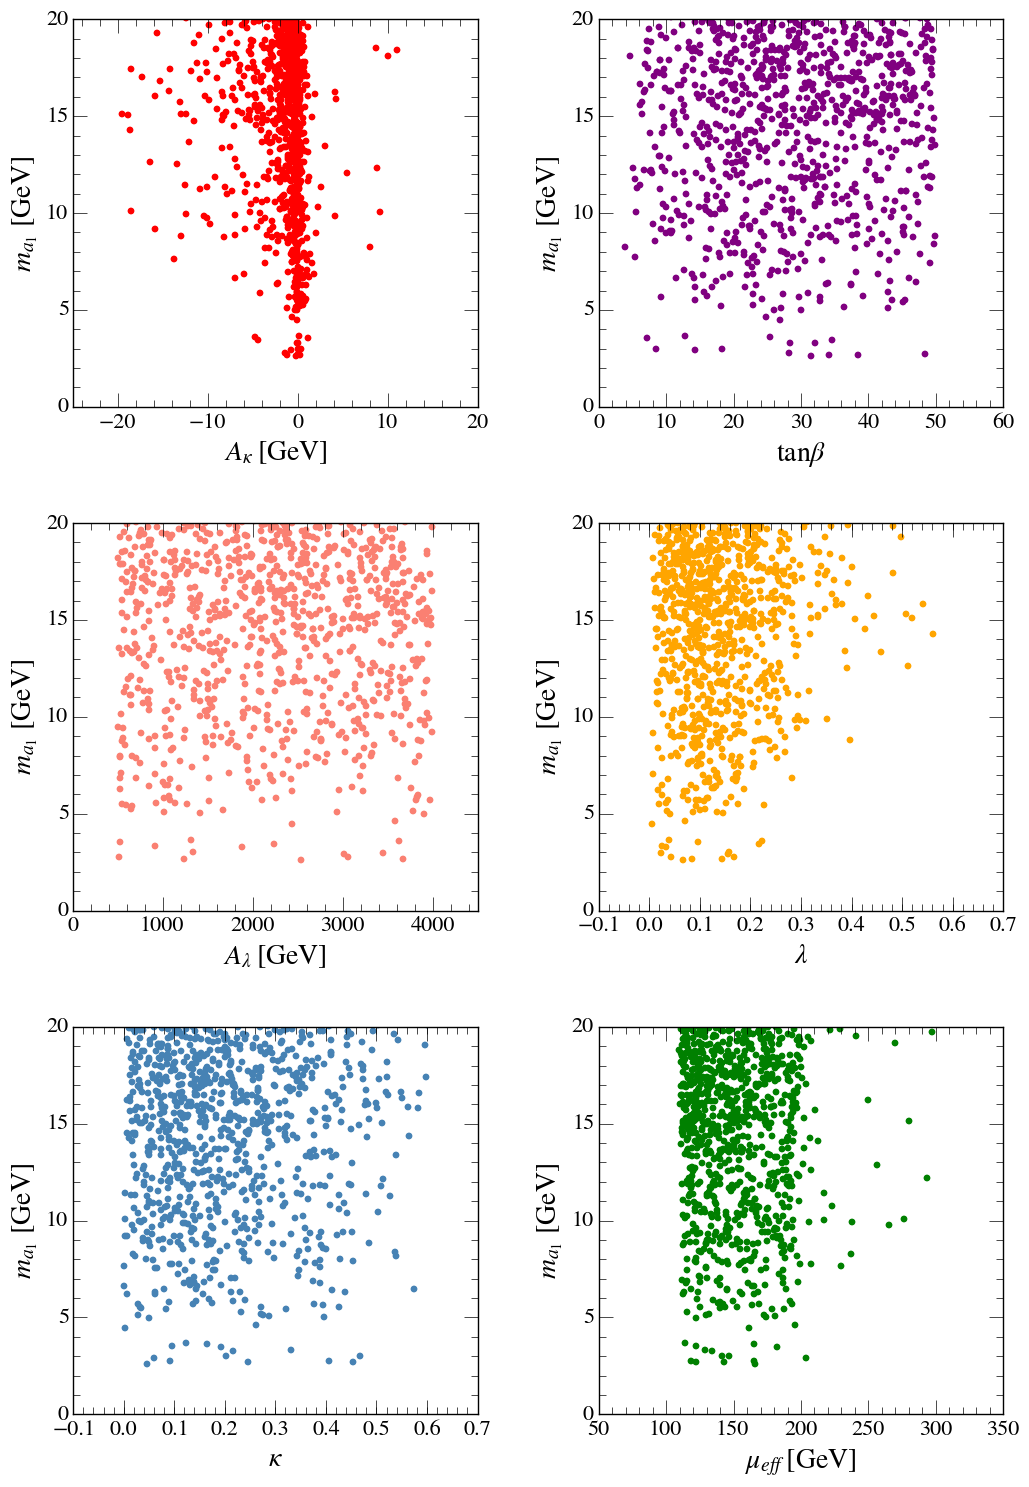

In [1035]:
plot_ma1_inputparams(df_pass_all[~df_pass_all.constraints.str.contains('chi2')], 
                     title, filename='Thesis_plots/ma1_inputparams_relaxed.png')

In [1036]:
@save_fig
def plot_mh1_inputparams(df, title, yrange=[0, 150]):
    plot_input_params_scatters(df, 'mh1', r'$m_{h_1}\ \mathrm{[GeV]}$', 
                               yrange=yrange, 
                               title=title, cols=2, s=SIZE)

Setting backend png
Setting backend png


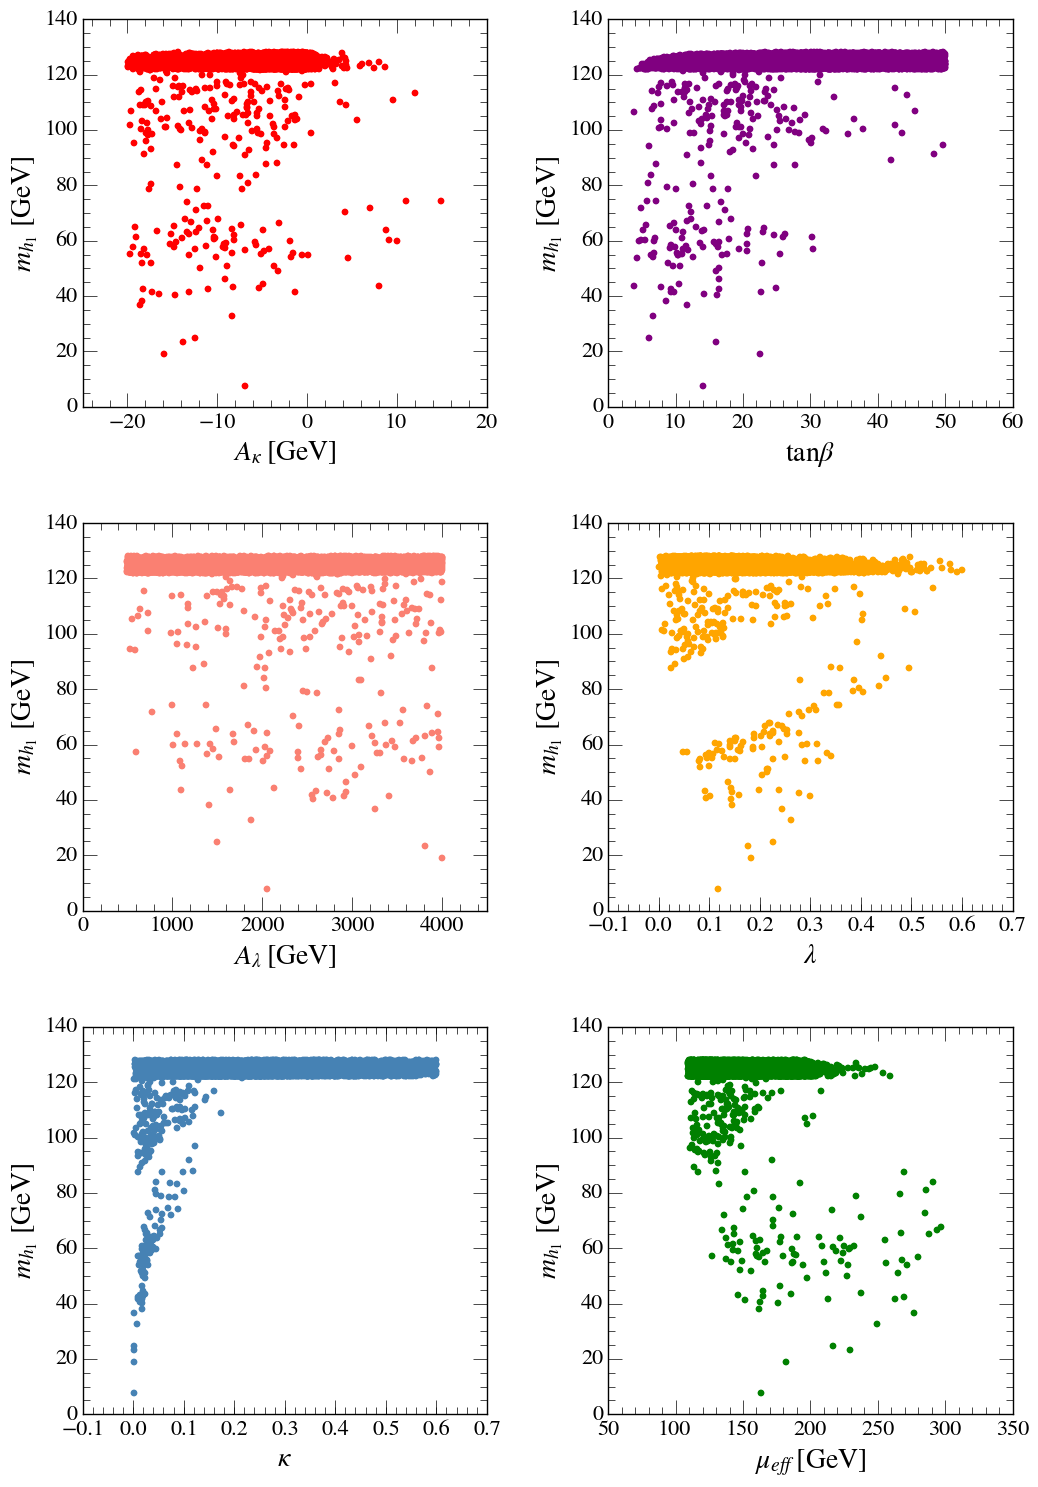

In [1037]:
plot_mh1_inputparams(df_pass_all[~df_pass_all.constraints.str.contains('chi2')], 
                     title, filename='Thesis_plots/mh1_inputparams_relaxed_h125.png', yrange=[0, 140])

Setting backend png
Setting backend png


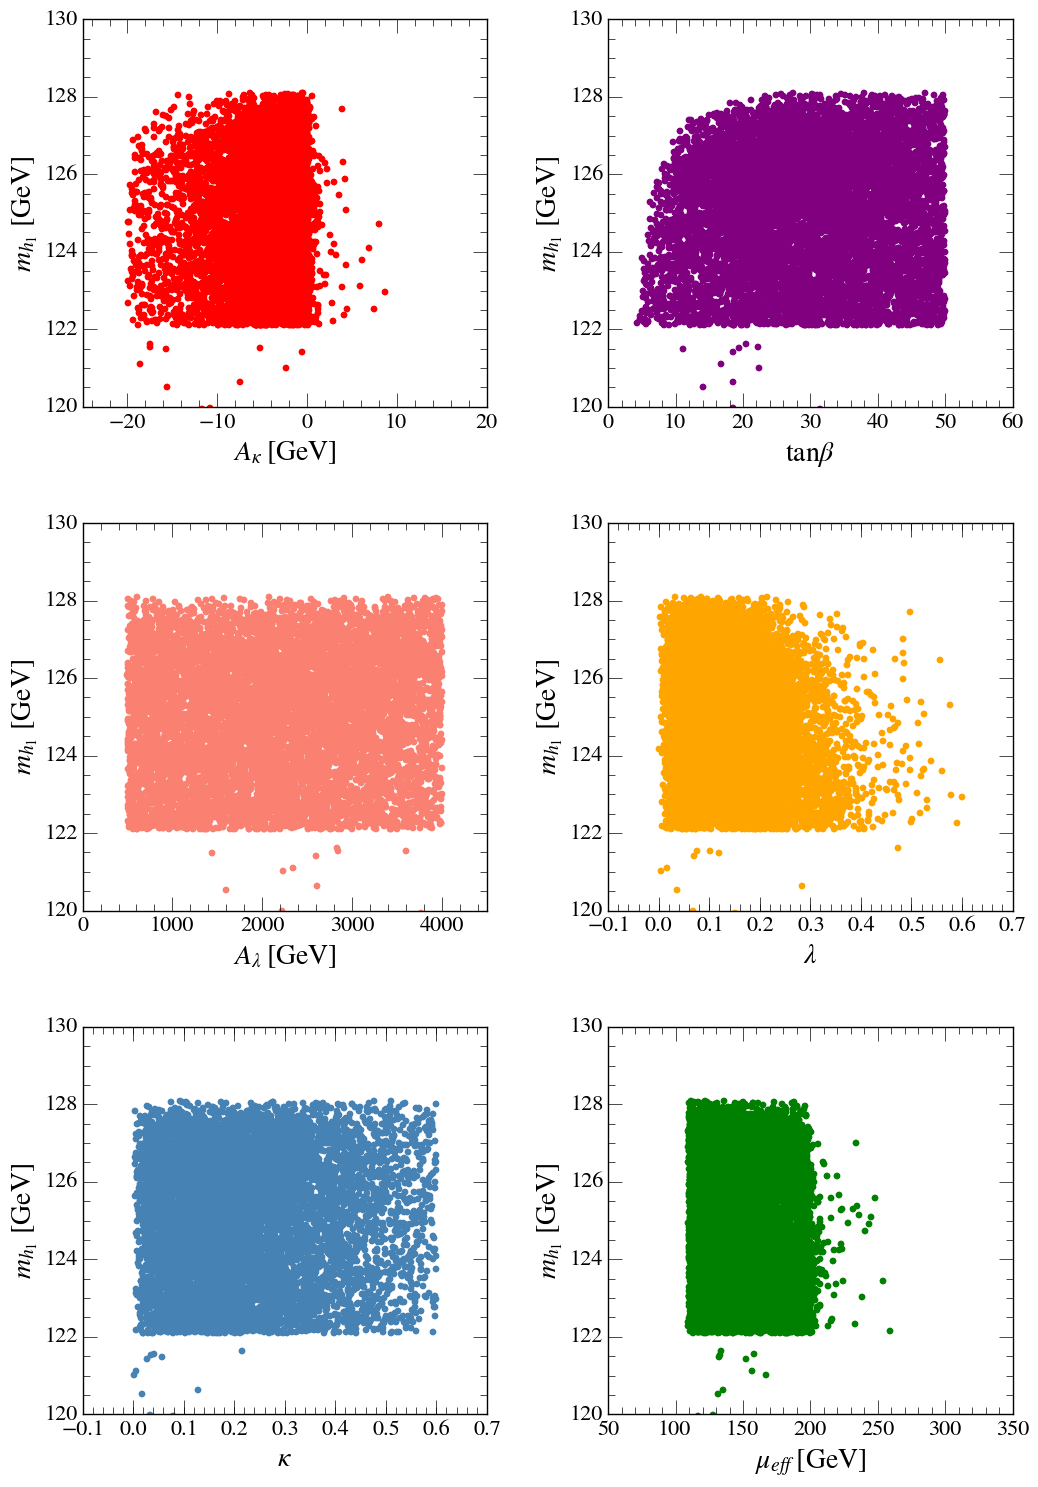

In [1038]:
plot_mh1_inputparams(df_pass_all[~df_pass_all.constraints.str.contains('chi2')], 
                     title, filename='Thesis_plots/mh1_inputparams_relaxed.png', yrange=[120,130])

In [1040]:
@save_fig
def plot_mh2_inputparams(df, title):
    plot_input_params_scatters(df, 'mh2', r'$m_{h_2}\ \mathrm{[GeV]}$', 
                               yrange=[120, 140], 
                               title=title, cols=2, s=SIZE)

Setting backend png
Setting backend png


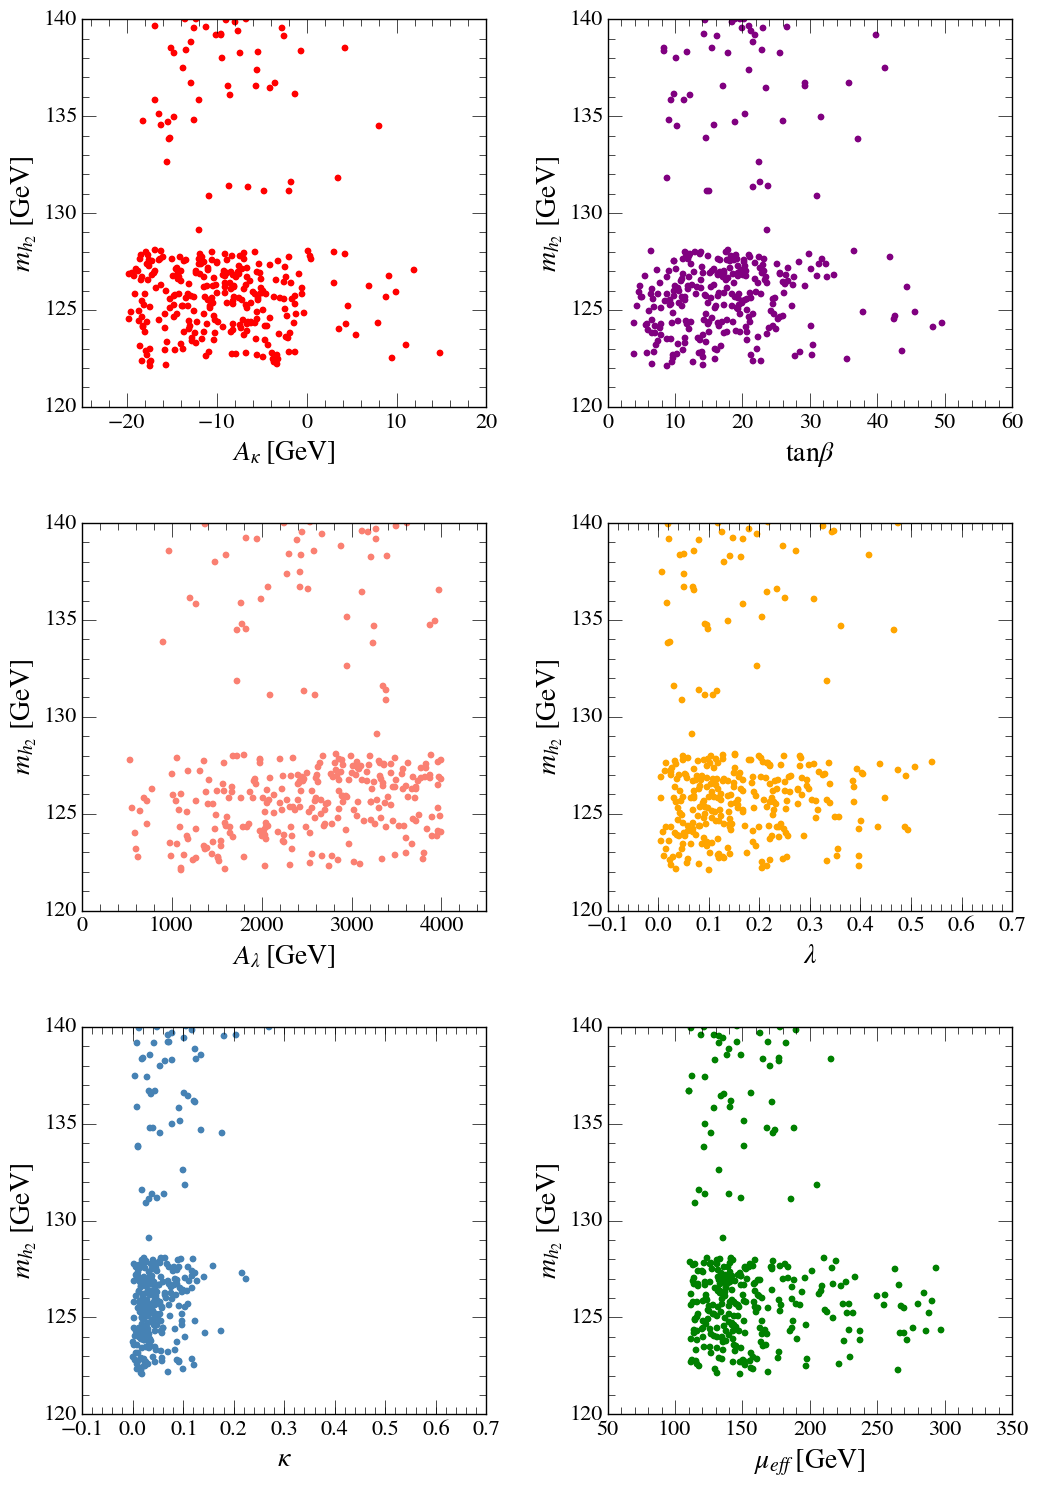

In [1041]:
plot_mh2_inputparams(df_pass_all[~df_pass_all.constraints.str.contains('chi2')], 
                     title, filename='Thesis_plots/mh2_inputparams_relaxed.png')

In [256]:
title = ''

In [1042]:
@save_fig
def plot_mh1_ma1_scatter(df, title):
    plot_scatter(df=df, xvar='ma1', yvar='mh1', 
                 xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$', 
                 ylabel=r'$m_{h_1}\ \mathrm{[GeV]}$',
                 color='dodgerblue', s=SIZE)
    plt.xlim(0, 60)
    plt.ylim(0, 140)
    plt.title(title)
    
    xmin, xmax = plt.xlim()
    ymin, ymax = xmin, xmax
    plt.plot([xmin, xmax], [ymin, ymax], linestyle='dashed', 
             label=r'$m_{h_1} =\ m_{a_1}$', linewidth=2)

#     plt.plot([xmin, xmax], [2*ymin, 2*ymax], linestyle='dashed', color='red',
#              label=r'$m_{h_1} =\ 2m_{a_1}$', linewidth=2)

#     plt.plot([xmin, xmax], [62.5, 62.5], linestyle='dashed', color='purple',
#              label=r'$m_{h_1} =\ 62.5\ \mathrm{GeV}$', linewidth=2)

    make_highlight_region(plt.gca(), [125-3, 125+3], 
                          'Y', color='k', alpha=1, fill=False,
                          label=r'$125 \pm 3\ \mathrm{GeV}$', hatch='xxx')
    
#     make_highlight_region(plt.gca(), [0, 62.5], 
#                           'Y', color='darkorchid', alpha=0.25, fill=True,
#                           label=r'$h_2 \to 2h_1\ \mathrm{allowed}$')

#     poly = patches.Polygon([[0, 0], [60, 0], [60, 62.5], [62.5/2, 62.5]], closed=True, 
    poly = patches.Polygon([[0, 0], [60, 0], [60, 62.5], [0, 62.5]], closed=True, 
                           color='darkorchid', fill=True, hatch='//', 
                           label=r'$h_2 \to 2h_1\ \mathrm{allowed}$', alpha=0.25)
    plt.gca().add_patch(poly)
    
    poly2 = patches.Polygon([[0, 0], [62.5/2, 62.5], [0, 62.5]], closed=True, 
                           fill=True, color='red', hatch=r"\\",
                           label=r'$h_2 \to 2h_1 \to 4a_1\ \mathrm{allowed}$', alpha=0.25)
    plt.gca().add_patch(poly2)

#     make_highlight_region(plt.gca(), [0, 62.5], 
#                           'Y', color='purple', alpha=0.2,
#                           label=r'$h_2 \to 2h_1\ \mathrm{allowed}$')

    plt.legend(loc='lower right', frameon=True, bbox_to_anchor=(1,0), framealpha=0.8, fontsize=14)
    plt.tight_layout()


Setting backend png
Setting backend png


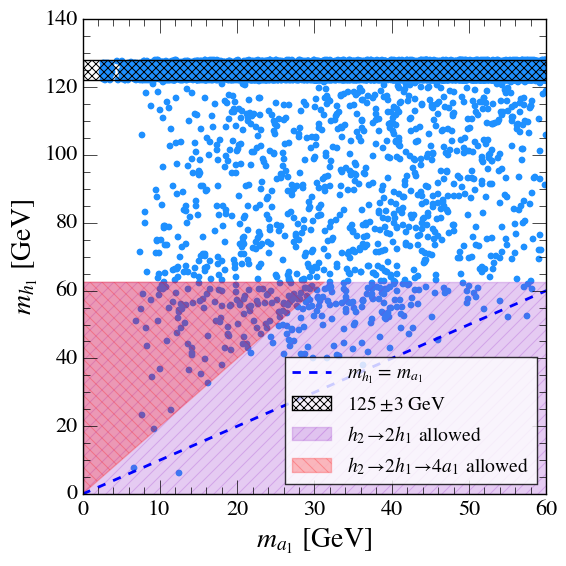

In [1043]:
plot_mh1_ma1_scatter(df_pass_all, title, filename='Thesis_plots/mh1_ma1_relaxed.png')

(<matplotlib.axes._subplots.AxesSubplot at 0x10ca32dd0>,
 <matplotlib.collections.PathCollection at 0x10c9aabd0>)

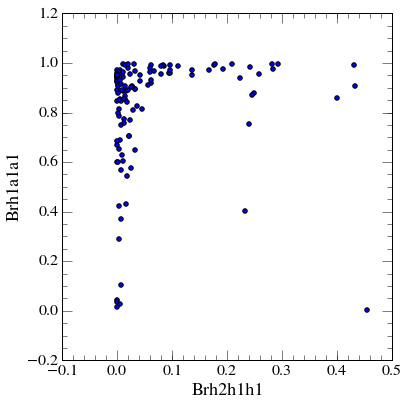

In [324]:
plot_scatter(df=df_pass_all.query('mh2 < 128.1'), xvar='Brh2h1h1', yvar='Brh1a1a1')

In [334]:
dff = df_pass_all.query('mh2<128.1')
nu_tautau =  dff['xsec_8_ggf_h2_2h1_4b'] * dff['Brh1a1a1'] * dff['Brh1a1a1'] * dff['Bra1tautau'] * dff['Bra1tautau'] / (dff['Brh1bb'] * dff['Brh1bb'])
nu_tautau = nu_tautau.dropna()

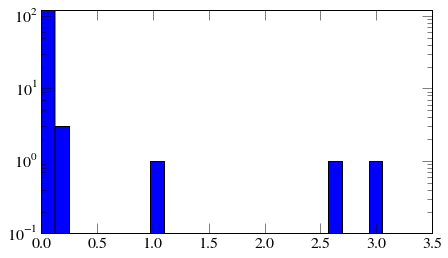

In [342]:
plt.hist(nu_tautau.values, bins=25)
plt.ylim(bottom=0.1)
plt.yscale('log')

In [343]:
dff = df_pass_all.query('mh2<128.1')
nu_bb =  dff['xsec_8_ggf_h2_2h1_4b'] * dff['Brh1a1a1'] * dff['Brh1a1a1'] * dff['Bra1bb'] * dff['Bra1bb'] / (dff['Brh1bb'] * dff['Brh1bb'])
nu_bb = nu_bb.dropna()

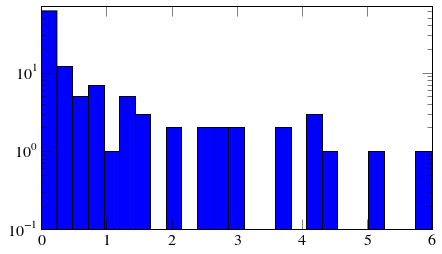

In [344]:
plt.hist(nu_bb.values, bins=25)
plt.ylim(bottom=0.1)
plt.yscale('log')

In [1044]:
@save_fig
def plot_mh2_ma1_scatter(df, title):
    plot_scatter(df=df, xvar='ma1', yvar='mh2', 
                 xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$', 
                 ylabel=r'$m_{h_2}\ \mathrm{[GeV]}$', 
                 color='green', s=SIZE)
    plt.xlim(0, 60)
    plt.ylim(80, 320)
#     plt.yscale('log')
    plt.title(title)
    make_highlight_region(plt.gca(), [125-3, 125+3], 
                          'Y', color='k', alpha=1, fill=False, hatch="xxx", 
                          label=r'$125 \pm 3\ \mathrm{GeV}$')
    plt.legend(loc='lower right', frameon=False)
    plt.tight_layout()


Setting backend png
Setting backend png


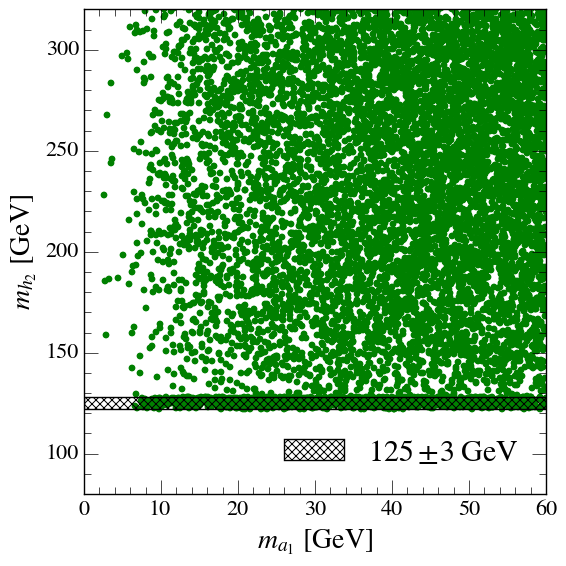

In [1045]:
plot_mh2_ma1_scatter(df_pass_all, title, filename='Thesis_plots/mh2_ma1_relaxed.png')

In [1046]:
@save_fig
def plot_mh2_mh1_scatter(df, title):
    plot_scatter(df=df, xvar='mh1', yvar='mh2', 
                 xlabel=r'$m_{h_1}\ \mathrm{[GeV]}$', 
                 ylabel=r'$m_{h_2}\ \mathrm{[GeV]}$',
                 color='red', s=SIZE)
    plt.xlim(0, 140)
    plt.ylim(80, 320)
    
    xmin, xmax = plt.xlim()
    ymin, ymax = xmin, xmax
    plt.plot([xmin, xmax], [ymin, ymax], linestyle='dashed', 
             label=r'$m_{h_2} =\ m_{h_1}$', linewidth=2)

    plt.title(title)
    make_highlight_region(plt.gca(), [125-3, 125+3], 
                          'X', color='k', alpha=1, fill=False, hatch='xxx')
    make_highlight_region(plt.gca(), [125-3, 125+3], 
                          'Y', color='k', alpha=1, fill=False, hatch='xxx', 
                          label=r'$125 \pm 3\ \mathrm{GeV}$')
    plt.legend(loc='upper left', frameon=False)
    plt.tight_layout()

Setting backend png
Setting backend png


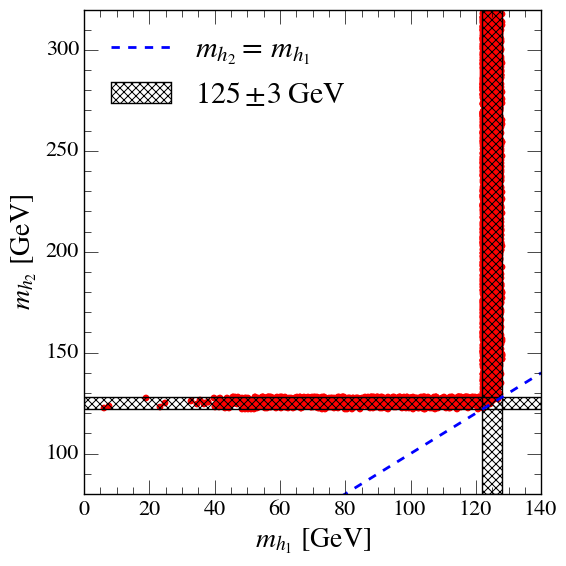

In [1047]:
plot_mh2_mh1_scatter(df_pass_all, title, filename='Thesis_plots/mh2_mh1_relaxed.png')

In [1048]:
import math

def plot_contours(ax, xlim=[0, 1], ylim=[0, 1], n_div=15, log_steps=False):
    """For contours of constant BR * ggh^2"""
    delta = min(xlim[1], ylim[1])/40.
    # generate a grid of x and y values
    x = np.arange(xlim[0], xlim[1]+delta, delta)
    y = np.arange(ylim[0], ylim[1]+delta, delta)
    X, Y = np.meshgrid(x, y)
    # generate a grid of the product of these values
    Z = X * Y

    if log_steps:
        max_v = xlim[1] * ylim[1]
        min_v = xlim[0] * ylim[0]
        print math.log(max_v, 10)-5, math.log(max_v, 10)+1
        n_div = np.logspace( math.log(max_v, 10)-5, math.log(max_v, 10)+1, num=7)

    manual_locations = [(math.sqrt(x), math.sqrt(x)) for x in n_div]
    manual_locations[-1] = (0.55, n_div[-1]/0.55)
    CS = ax.contour(X, Y, Z, n_div, colors='k')
    ax.clabel(CS, inline=1, fontsize=16, fmt='%g', manual=manual_locations)


@save_fig    
def plot_grc2_br(df, mass_range, title):
    fig, ax = generate_fig_axes(size=(8,7))

    n_div = [1E-2, 2E-2, 5E-2, 1E-1, 2E-1, 5E-1]
    plot_contours(plt.gca(), n_div=n_div)

    F = 3

    df = df.query('%f<ma1<%f' % (mass_range[0], mass_range[1]))
    plot_scatter(ax=ax, df=df.query('122.1 < mh1 < 128.1 & mh2>128.1'), 
                 xvar='h1ggrc2', yvar='Brh1a1a1', color='blue', 
                 label=r'$h_{125} = h_1,\ h_i = h_1,\ X = a_1$',
                 marker='s', s=F*SIZE, alpha=0.75)
    plot_scatter(ax=plt.gca(), df=df.query('122.1 < mh2 < 128.1'), 
                 xvar='h2ggrc2', yvar='Brh2a1a1', color='red', 
                 label=r'$h_{125} = h_2,\ h_i = h_2,\ X = a_1$',
                 marker='o', s=F*SIZE, alpha=0.95)
    plot_scatter(ax=plt.gca(), df=df.query('122.1 < mh1 < 128.1 & mh2>128.1'), 
                 label=r'$h_{125} = h_1,\ h_i = h_2,\ X = a_1$',
                 xvar='h2ggrc2', yvar='Brh2a1a1', color='purple', 
                 marker='s', s=F*SIZE, alpha=0.75)
    plot_scatter(ax=plt.gca(), df=df.query('122.1 < mh2 < 128.1'), 
                 label=r'$h_{125} = h_2,\ h_i = h_1,\ X = a_1$',
                 xvar='h1ggrc2', yvar='Brh1a1a1', color='green', 
                 marker='o', s=F*SIZE, alpha=0.95)

    plot_scatter(ax=plt.gca(), df=df.query('%f<mh1<%f & 122.1 < mh2 < 128.1' % (mass_range[0], mass_range[1])), 
                 label=r'$h_{125} = h_2,\ h_i = h_2,\ X = h_1$',
                 xvar='h2ggrc2', yvar='Brh2h1h1', color='orange', 
                 marker='^', s=F*SIZE, alpha=0.95)

    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)


    plt.xlabel(r'$g_{ggh_i}^2$')
    plt.ylabel(r'$BR(h_i \to XX)$')

    plt.legend(loc='upper right', fontsize=15, framealpha=0.85, frameon=False)

    plt.title(title)
    plt.tight_layout()

In [967]:
low_mass_title = r'$m_{X} < 10.5\ \mathrm{GeV}$'
hi_mass_title = r'$12 < m_{X} < 62\ \mathrm{GeV}$'

Setting backend pdf
Setting backend png


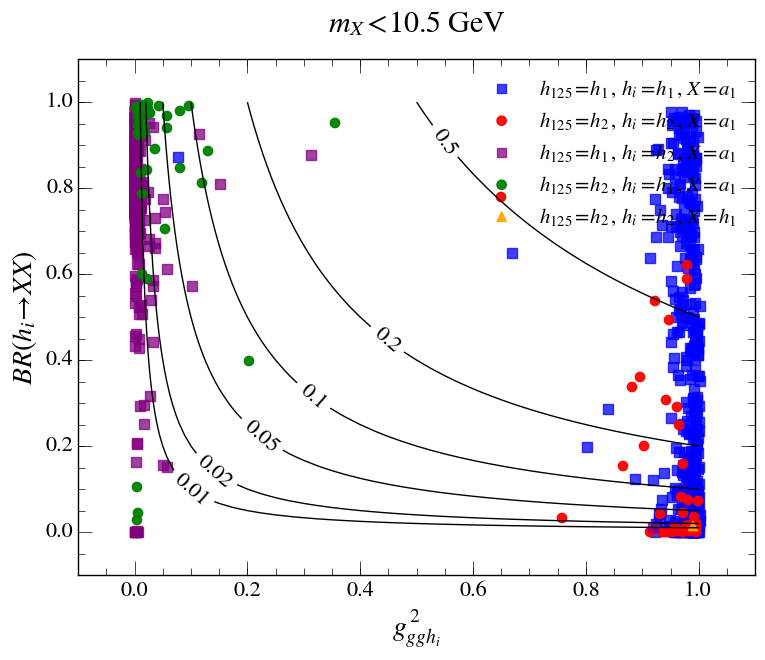

In [1049]:
plot_grc2_br(df_pass_all, [0, 10.5], low_mass_title, filename='Thesis_plots/rc2_br_ma1Lt10p5.pdf')

Setting backend pdf
Setting backend png


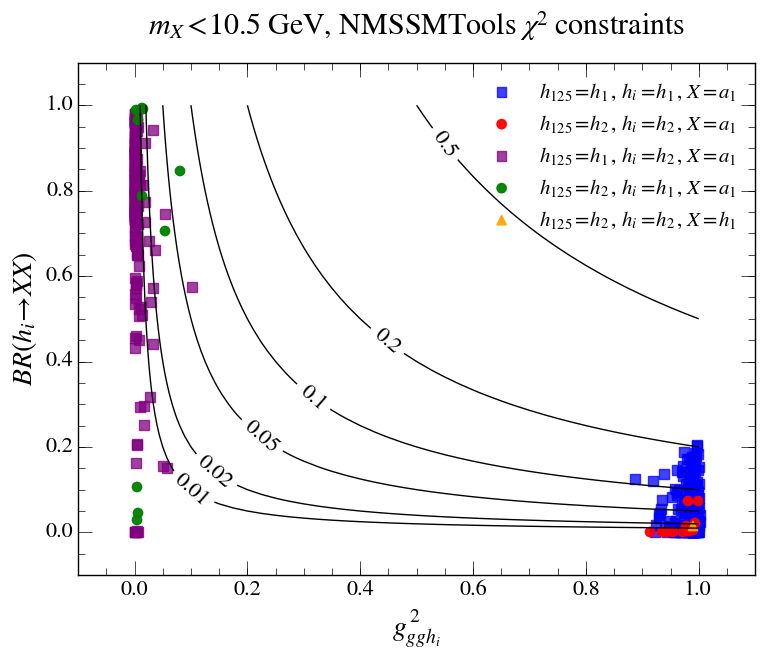

In [1050]:
plot_grc2_br(df_pass_all[~df_pass_all.constraints.str.contains('chi2')], [0, 10.5], 
             low_mass_title + ", NMSSMTools " + r'$\chi^2$' + 'constraints', 
             filename='Thesis_plots/rc2_br_ma1Lt10p5_NT.pdf')

Setting backend pdf
Setting backend png


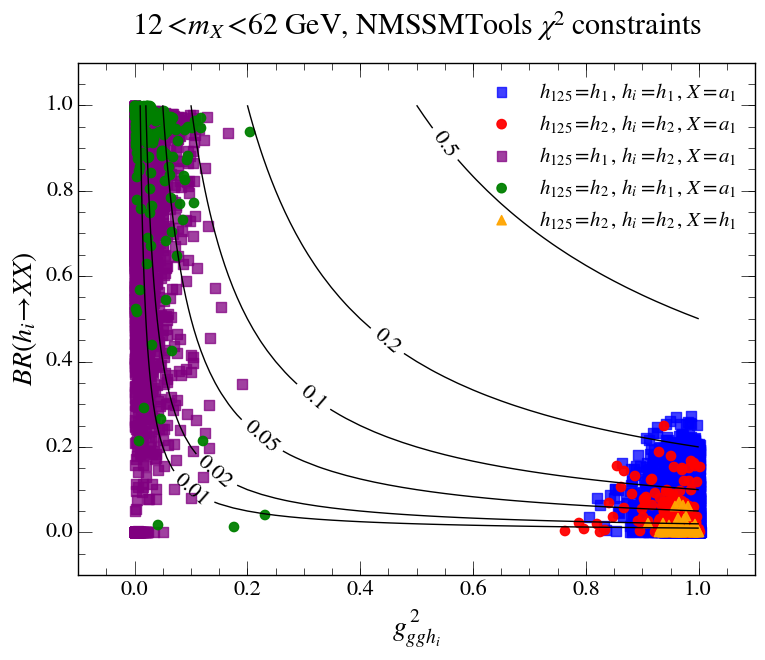

In [1051]:
plot_grc2_br(df_pass_all[~df_pass_all.constraints.str.contains('chi2')], [12, 62], 
             hi_mass_title + ", NMSSMTools " + r'$\chi^2$' + 'constraints', 
             filename='Thesis_plots/rc2_br_ma1Gt12_NT.pdf')

Setting backend pdf
Setting backend png


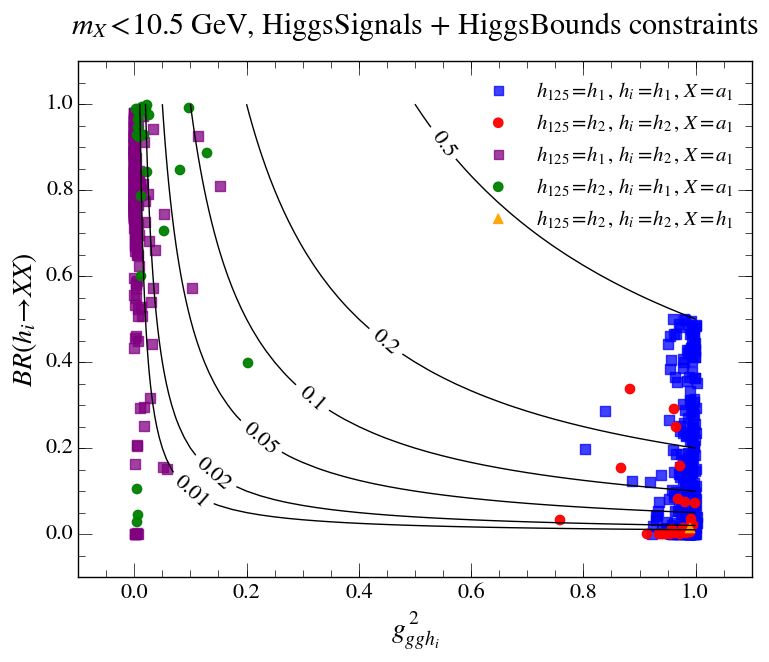

In [1052]:
plot_grc2_br(df_pass_all.query('HSprob>0.05 & HBresult==1'), [0, 10.5],
             low_mass_title + ', HiggsSignals + HiggsBounds constraints', 
             filename='Thesis_plots/rc2_br_ma1Lt10p5_HSHB.pdf')

Setting backend pdf
Setting backend png


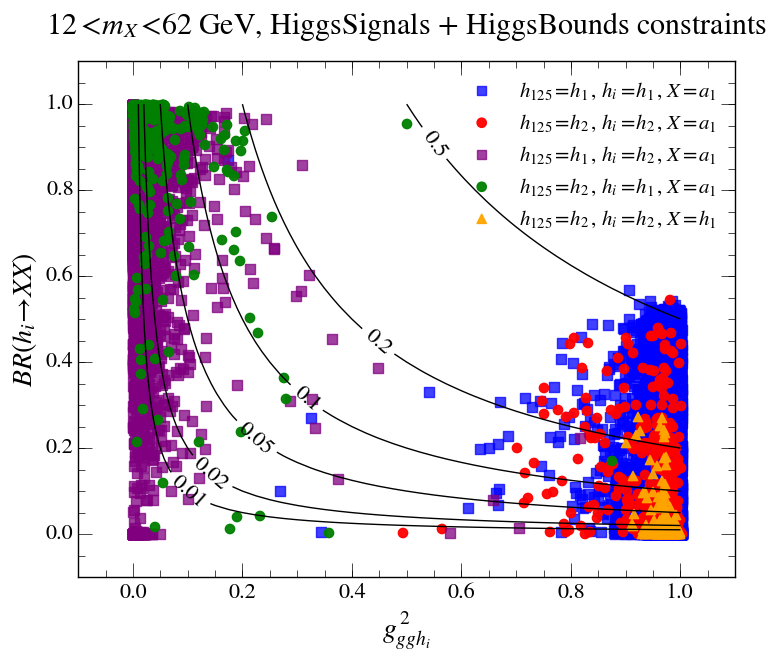

In [1053]:
plot_grc2_br(df_pass_all.query('HSprob>0.05 & HBresult==1'), [12, 62],
             hi_mass_title + ', HiggsSignals + HiggsBounds constraints', 
             filename='Thesis_plots/rc2_br_ma1Gt12_HSHB.pdf')

In [1054]:
@save_fig
def plot_h1zz_NT_HSHB(df, title):
    df = df.query('122.2 < mh1 < 128.1 & mh2>128.1')

    var = 'Brh1zz'
    nbins = 50
    xlim = [0, 5E-2]
    lw = 1
    norm = False
    
    pass_NT = ~df.constraints.str.contains('ZZ')
    plot_histogram(df=df[pass_NT], var=var, bins=nbins, range=xlim, 
                   label='Pass NT '+r'$ZZ\ \chi^2$', histtype='step', linewidth=lw, 
                   errorbars=False, normed=norm)

    pass_NT = ~df.constraints.str.contains('chi2')
    plot_histogram(ax=plt.gca(), df=df[pass_NT], var=var, bins=nbins, range=xlim, 
                   label='Pass NT all '+r'$\chi^2$', histtype='step', linewidth=lw, linestyle='dashed', 
                   errorbars=False, normed=norm)

    pass_HBHS = (df.HBresult==1) & (df.HSprob>0.05)
    plot_histogram(ax=plt.gca(), df=df[pass_HBHS], var=var, bins=nbins, range=xlim, 
                   label='Pass HS + HB', histtype='step', linewidth=lw,
                   errorbars=False, normed=norm)
    
    plt.xlabel(r'$BR(h_1 \to ZZ)$')
    plt.xlim(*xlim)
    plt.legend(loc='best', fontsize=16, frameon=False)
#     plt.ylim(1E-3, 1)
    plt.yscale('log')

Setting backend pdf
Setting backend png


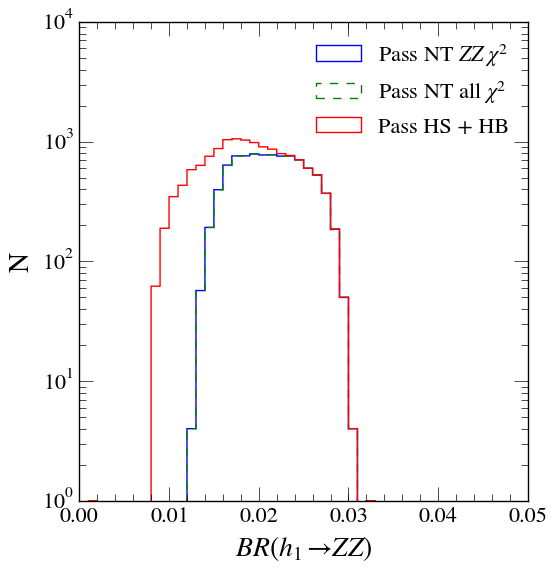

In [1055]:
plot_h1zz_NT_HSHB(df_pass_all, '', filename='Thesis_plots/h1zz_NT_HSHB.pdf')

In [1056]:
@save_fig
def plot_h1bb_NT_HSHB(df, title):
    set_backend('pdf')
    df = df.query('122.2 < mh1 < 128.1 & mh2>128.1')

    var = 'Brh1bb'
    xlim = [0.2, 0.8]
    nbins = 50
    lw = 1
    norm = False
    
    pass_NT = ~df.constraints.str.contains('bb')
    plot_histogram(df=df[pass_NT], var=var, bins=nbins, range=xlim, 
                   label='Pass NT '+r'$b\bar{b}\ \chi^2$', histtype='step', linewidth=lw, 
                   errorbars=False, normed=norm)

    pass_NT = ~df.constraints.str.contains('chi2')
    plot_histogram(ax=plt.gca(), df=df[pass_NT], var=var, bins=nbins, range=xlim, 
                   label='Pass NT all '+r'$\chi^2$', histtype='step', linewidth=lw, linestyle='dashed',
                   errorbars=False, normed=norm)

    pass_HBHS = (df.HBresult==1) & (df.HSprob>0.05)
    plot_histogram(ax=plt.gca(), df=df[pass_HBHS], var=var, bins=nbins, range=xlim, 
                   label='Pass HS + HB', histtype='step', linewidth=lw, #linestyle='dashed',
                   errorbars=False, normed=norm)
    
    plt.xlabel(r'$BR(h_1 \to b\bar{b})$')
    plt.xlim(*xlim)
    plt.legend(loc='upper left', fontsize=16, frameon=False)
#     plt.ylim(1E-3, 1)
    plt.yscale('log')

Setting backend pdf
Setting backend pdf
Setting backend png


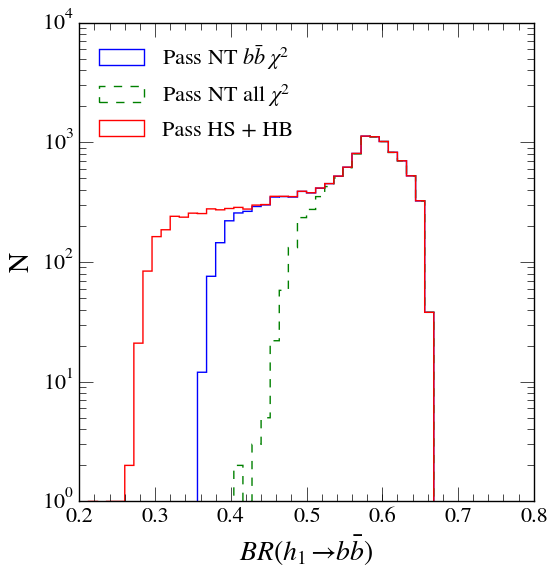

In [1057]:
plot_h1bb_NT_HSHB(df_pass_all, '', filename='Thesis_plots/h1bb_NT_HSHB.pdf')

In [1061]:
@save_fig
def plot_h1gg_NT_HSHB(df, title):
    df = df.query('122.2 < mh1 < 128.1')

    var = 'Brh1gg'
    xlim = [0, 0.1]
    nbins = 50
    lw = 1
    norm = False
    
    pass_NT = ~df.constraints.str.contains('gg')
    plot_histogram(df=df[pass_NT], var=var, bins=nbins, range=xlim, 
                   label='Pass NT '+r'$\gamma\gamma\ \chi^2$', histtype='step', linewidth=lw, 
                   errorbars=False, normed=norm)

    pass_NT = ~df.constraints.str.contains('chi2')
    plot_histogram(ax=plt.gca(), df=df[pass_NT], var=var, bins=nbins, range=xlim, 
                   label='Pass NT all '+r'$\chi^2$', histtype='step', linewidth=lw, linestyle='dashed',
                   errorbars=False, normed=norm)

    pass_HBHS = (df.HBresult==1) & (df.HSprob>0.05)
    plot_histogram(ax=plt.gca(), df=df[pass_HBHS], var=var, bins=nbins, range=xlim, 
                   label='Pass HS + HB', histtype='step', linewidth=lw, #linestyle='dashed',
                   errorbars=False, normed=norm)
    
    plt.xlim(*xlim)
    plt.xlabel(r'$BR(h_1 \to \gamma\gamma)$')
    plt.legend(loc='upper left', fontsize=16, frameon=False)
#     plt.ylim(1E-3, 1)
    plt.yscale('log')

Setting backend pdf
Setting backend png


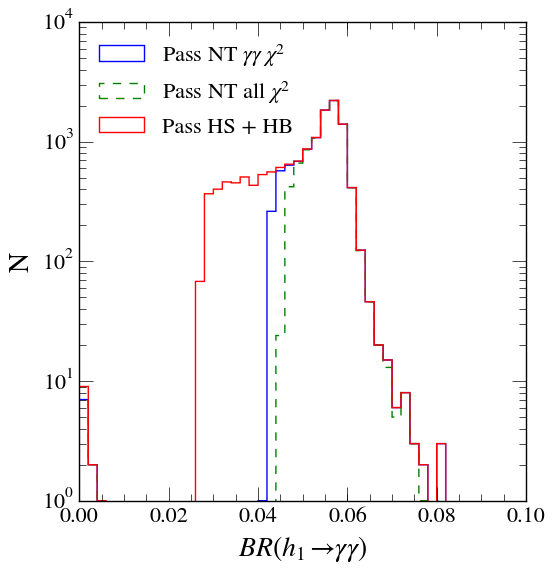

In [1062]:
plot_h1gg_NT_HSHB(df_pass_all, '', filename='Thesis_plots/h1gg_NT_HSHB.pdf')

In [1063]:
@save_fig
def plot_h1a1a1_NT_HSHB(df, title):
    
    df = df.query('122.1 < mh1 < 128.1 & mh2>128.1')
    
    var = 'Brh1a1a1'
    nbins = 50
    xlim = [0, 1]
    norm = False
    lw = 1
    err = False
    
    pass_zz = ~df.constraints.str.contains('ZZ')
    plot_histogram(df=df[pass_zz], var=var, bins=nbins, range=xlim, 
                   label='Pass NT '+r'$ZZ\ \chi^2$', histtype='step', linewidth=lw, 
                   errorbars=err, normed=norm)
    
    pass_bb = ~df.constraints.str.contains('bb')
    plot_histogram(ax=plt.gca(), df=df[pass_bb], var=var, bins=nbins, range=xlim, 
                   label='Pass NT '+r'$b\bar{b}\ \chi^2$', histtype='step', linewidth=lw, 
                   errorbars=err, normed=norm)
    
    pass_gg = ~df.constraints.str.contains('gg')
    plot_histogram(ax=plt.gca(), df=df[pass_gg], var=var, bins=nbins, range=xlim, 
                   label='Pass NT '+r'$\gamma\gamma\ \chi^2$', histtype='step', linewidth=lw, 
                   errorbars=err, normed=norm, color='purple')

    pass_nt = ~df.constraints.str.contains('chi2')
    plot_histogram(ax=plt.gca(), df=df[pass_nt], var=var, bins=nbins, range=xlim, 
                   label='Pass NT all '+r'$\chi^2$', histtype='step', linewidth=2*lw, 
                   errorbars=err, normed=norm, color='darkorange', linestyle='dashed')
    
    pass_HBHS = (df.HBresult==1) & (df.HSprob>0.05)
    plot_histogram(ax=plt.gca(), df=df[pass_HBHS], var=var, bins=nbins, range=xlim, 
                   label='Pass HS + HB', histtype='step', linewidth=lw, #linestyle='dashed',
                   errorbars=err, normed=norm, color='red')

    plt.xlim(*xlim)
    plt.xlabel(r'$BR(h_1 \to a_1a_1)$')
    plt.legend(loc='upper right', fontsize=16, frameon=False)
#     plt.ylim(1E-3, 1)
    plt.yscale('log')

Setting backend pdf
Setting backend png


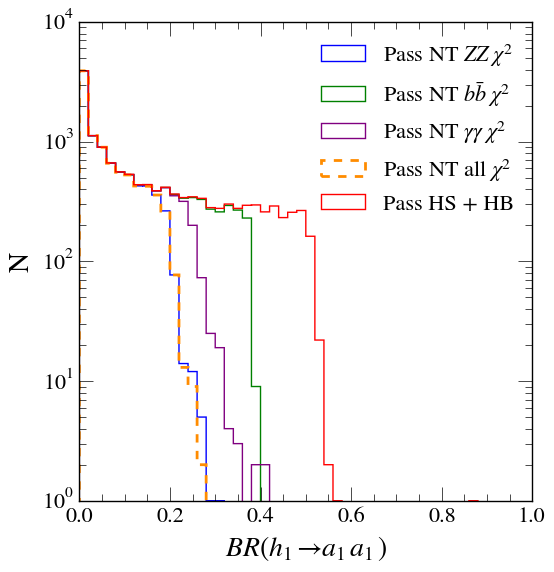

In [1064]:
plot_h1a1a1_NT_HSHB(df_pass_all, '', filename='Thesis_plots/h1a1a1_NT_HSHB.pdf')

In [1065]:
@save_fig
def plot_bra1_ma1(df, title):
    fig, ax = generate_fig_axes()
    plot_scatter(ax = ax, df=df, xvar='ma1', yvar='Bra1tautau', color='green', label=r'$\tau\tau$', s=SIZE)
    plot_scatter(ax=plt.gca(), df=df, xvar='ma1', yvar='Bra1mumu', color='red', label=r'$\mu\mu$', s=SIZE)
    plot_scatter(ax=plt.gca(), df=df, xvar='ma1', yvar='Bra1bb', color='blue', label=r'$b\bar{b}$', s=SIZE)
    plot_scatter(ax=plt.gca(), df=df, xvar='ma1', yvar='Bra1cc', color='orange', label=r'$c\bar{c}$', s=SIZE)
    plot_scatter(ax=plt.gca(), df=df, xvar='ma1', yvar='Bra1ss', color='fuchsia', label=r'$s\bar{s}$', s=SIZE)
    plot_scatter(ax=plt.gca(), df=df, xvar='ma1', yvar='Bra1gg', color='purple', label=r'$gg$', s=SIZE)
    plt.xlim(0, 25)
    plt.ylim(1E-3, 1.2)
    plt.yscale('log')
    plt.legend(loc='lower right', fontsize=16, framealpha=0.85)
    plt.xlabel(r'$m_{a_1}\ \mathrm{[GeV]}$')
    plt.ylabel(r'$BR(a_1 \to XX)$')
    plt.tight_layout()

Setting backend png
Setting backend png


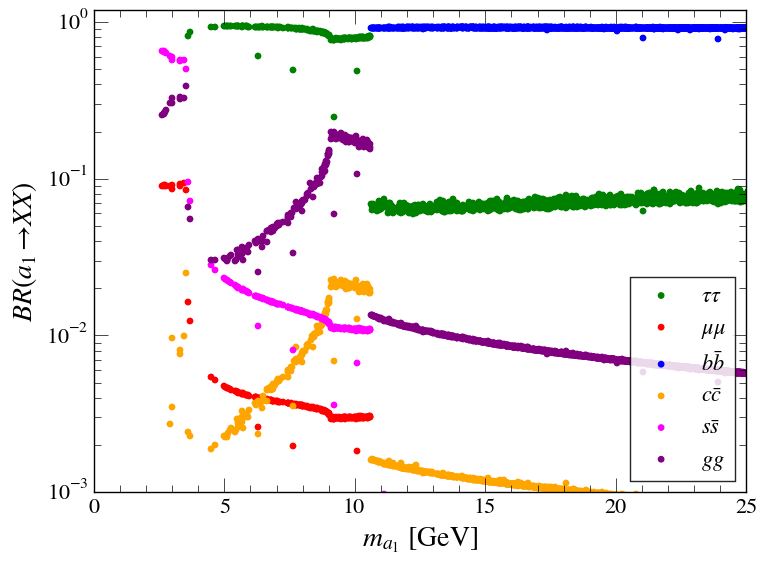

In [1066]:
plot_bra1_ma1(df_pass_all[~df_pass_all.constraints.str.contains('chi2')], title, filename='Thesis_plots/bra1_ma1.png')

In [1067]:
@save_fig
def plot_brh1_mh1(df, title):
    fig, ax = generate_fig_axes()
    plot_scatter(ax = ax, df=df, xvar='mh1', yvar='Brh1tautau', color='green', label=r'$\tau\tau$', s=SIZE)
    plot_scatter(ax=plt.gca(), df=df, xvar='mh1', yvar='Brh1mumu', color='red', label=r'$\mu\mu$', s=SIZE)
    plot_scatter(ax=plt.gca(), df=df, xvar='mh1', yvar='Brh1bb', color='blue', label=r'$b\bar{b}$', s=SIZE)
    plot_scatter(ax=plt.gca(), df=df, xvar='mh1', yvar='Brh1cc', color='orange', label=r'$c\bar{c}$', s=SIZE)
#     plot_scatter(ax=plt.gca(), df=df, xvar='mh1', yvar='Brh1ss', color='fuchsia', label=r'$s\bar{s}$', s=SIZE)
    plot_scatter(ax=plt.gca(), df=df, xvar='mh1', yvar='Brh1gg', color='purple', label=r'$gg$', s=SIZE)
    plt.xlim(0, 25)
    plt.ylim(1E-3, 1.2)
    plt.yscale('log')
    plt.legend(loc='best', fontsize=16, framealpha=0.85)
    plt.xlabel(r'$m_{h_1}\ \mathrm{[GeV]}$')
    plt.ylabel(r'$BR(h_1 \to XX)$')

Setting backend png
Setting backend png


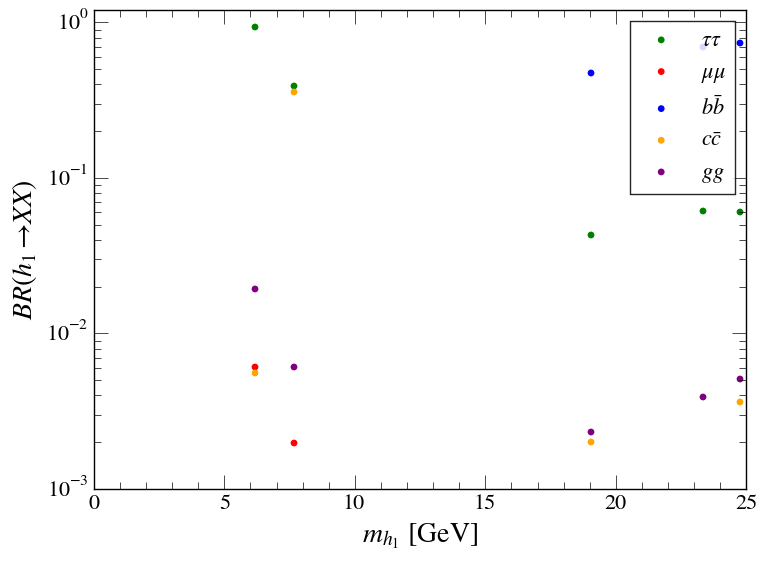

In [1068]:
plot_brh1_mh1(df_pass_all, title, filename='Thesis_plots/brh1_mh1.png')